In [1]:
%matplotlib notebook

One prediction of Philips model is that higher odor intensity should yield faster depolarization block.

I have data for 10, 100 and 1000 uM.

Here, I'll show all 3 conditions

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
from scipy import io as sio


C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
save_path = 'Declare Path'
path_exp_data = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys\\Or42bSF EtB\\step stim')

path_5uM = Path(path_exp_data, 'EtB 5000000pM')

for current_file in path_5uM.iterdir():
    if 'csv' in current_file.name:
        data_5uM = pd.read_csv(current_file)

path_10uM = Path(path_exp_data, 'EtB 10000000pM')

for current_file in path_10uM.iterdir():
    if 'csv' in current_file.name:
        data_10uM = pd.read_csv(current_file)
        
path_100uM = Path(path_exp_data, 'EtB 100000000pM')

for current_file in path_100uM.iterdir():
    if 'csv' in current_file.name:
        data_100uM = pd.read_csv(current_file)
        
path_1000uM = Path(path_exp_data, 'EtB 1000000000pM')

for current_file in path_1000uM.iterdir():
    if 'csv' in current_file.name:
        data_1000uM = pd.read_csv(current_file)

In [4]:
# colors = plt.cm.YlOrRd(np.linspace(0,1,5))
# colors2 = plt.cm.Blues(np.linspace(0,1,5))
# colors2 = plt.cm.Greys(np.linspace(0,1,5))

colors = plt.cm.Blues(np.linspace(0,1,5))
colors2 = plt.cm.YlOrRd(np.linspace(0,1,5))

In [5]:
plt.rcParams['svg.fonttype'] = 'none'
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 20,
    'style'  : 'normal'}

plt.rc('font', **font)

In [6]:
# This is the path on the shared google drive provided by Philip
root_path_sim = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\OSN_simulations')
# In order for Matthieu to run this script, I will save the plots directly on the shared folder

aq_rate = 10000 # All ephys recordings were done at 10 kHz

sim_rate = 1000 # To be checked by Philip!

sim_files = [
    'Or42bSF EtB_EtB 5000000pM.mat',
    'Or42bSF EtB_EtB 10000000pM.mat',
    'Or42bSF EtB_EtB 100000000pM.mat',
    'Or42bSF EtB_EtB 1000000000pM.mat']


concentrations = []
mean_PSTH = []
count = 0

sim_data0 = sio.loadmat(Path(root_path_sim,sim_files[0]))
sim_data1 = sio.loadmat(Path(root_path_sim,sim_files[1]))
sim_data2 = sio.loadmat(Path(root_path_sim,sim_files[2]))
sim_data3 = sio.loadmat(Path(root_path_sim,sim_files[3]))


<IPython.core.display.Javascript object>


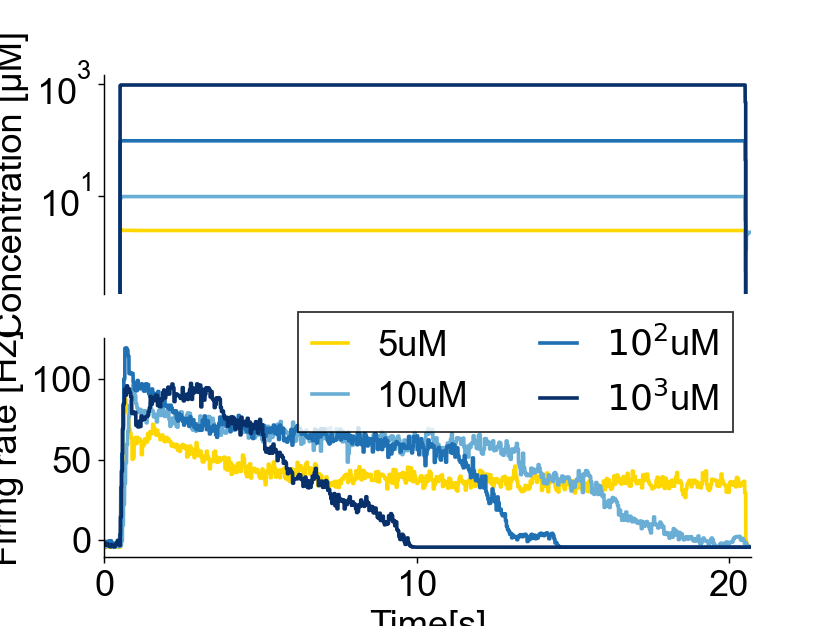

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)

x_min = 4.5

def plot_data(data, odor_conc, color,color2,label):
    '''
    odor conc in uM
    '''
    lw = 2
    
    try:
        delivered_odor = data['pressure [mbar]']
    except KeyError:
        delivered_odor = data['pressure Ch2 [mbar]']
        
    delivered_odor.iloc[delivered_odor<5] = 0 # Necessary as we have a 3 mbar background
    # pressure to avoid having bath water sucked into the pipette (happens at 0 mbar) which
    # would then delay the odor delivery at the next pulse. At this low pressure (1.5% of max) 
    # no odor is being presented, hence it is set to 0
    
    delivered_odor = delivered_odor/200 * odor_conc
        
    ax1.plot(data['Time [s]'], delivered_odor,color = color,lw=lw)

    ax2.plot(data['Time [s]'], data['PSTH [Hz]'],color = color2,lw=lw, label = label)
    
plot_data(data_5uM - x_min, odor_conc=5,color='gold',color2='gold',label = '5uM')
plot_data(data_10uM - x_min, odor_conc=10,color=colors[2],color2=colors[2],label = '10uM')
plot_data(data_100uM - x_min, odor_conc=100,color=colors[3],color2=colors[3],label = '$10^2$uM')
plot_data(data_1000uM - x_min, odor_conc=1000,color=colors[4],color2=colors[4],label = '$10^3$uM')

ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
ax1.set_ylabel('Concentration [μM]')
ax2.set_ylabel('Firing rate [Hz]')
ax2.set_xlabel('Time[s]')

# ax2.set_xlim(4.9, 25.05)
ax2.set_xlim(0, 25.2 - x_min)
ax2.xaxis.set_ticks([0,10,20])
ax2.yaxis.set_ticks([0,50,100])
ax1.set_yscale('log')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
    
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.legend()
handles, labels = ax2.get_legend_handles_labels()
leg = ax2.legend(handles,labels,loc='upper right',ncol=2, bbox_to_anchor=(1,1.2),handlelength=1)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_boxstyle('Square',pad=0)


#fig.savefig(Path(save_path, 'Fig5_delta_tau_relationship_1.svg'))

<IPython.core.display.Javascript object>


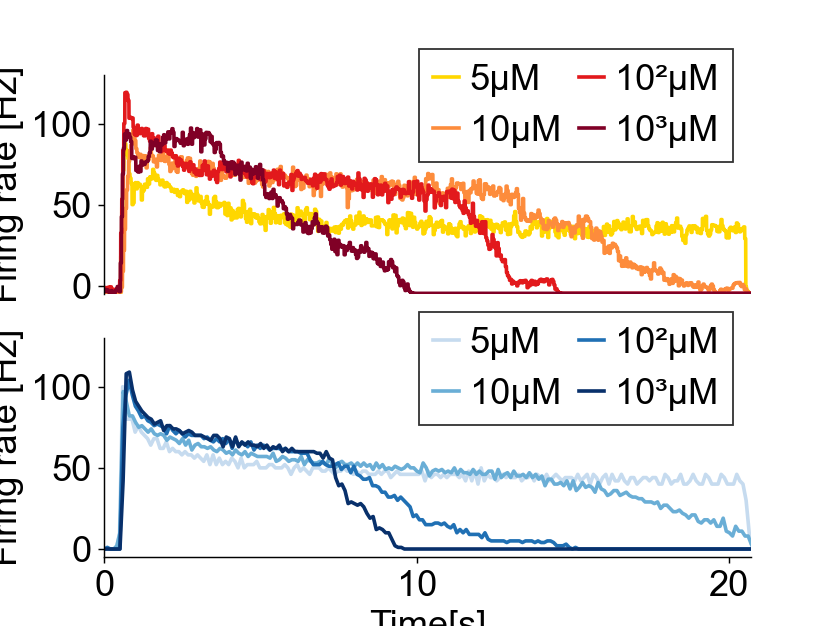

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)

x_min = 4.5

def plot_data(data,sim_data, color,color2,label):
    '''
    odor conc in uM
    '''
    lw = 2

    try:
        delivered_odor = data['pressure [mbar]']
    except KeyError:
        delivered_odor = data['pressure Ch2 [mbar]']
        
    delivered_odor.iloc[delivered_odor<5] = 0 # Necessary as we have a 3 mbar background
    # pressure to avoid having bath water sucked into the pipette (happens at 0 mbar) which
    # would then delay the odor delivery at the next pulse. At this low pressure (1.5% of max) 
    # no odor is being presented, hence it is set to 0
    
    time_sim_PSTH = sim_data['sim'][0][0]['yt'].T - x_min
    sim_PSTH = sim_data['sim'][0][0]['y']

    ax1.plot(data['Time [s]'], data['PSTH [Hz]'],color = color2,lw=lw, label = label)
    ax2.plot(time_sim_PSTH,sim_PSTH,color = color,lw=lw,label = label)

    
plot_data(data_5uM - x_min, sim_data0,color=colors[1],color2='gold',label = '5µM')
plot_data(data_10uM - x_min, sim_data1,color=colors[2],color2=colors2[2],label = '10µM')
plot_data(data_100uM - x_min, sim_data2,color=colors[3],color2=colors2[3],label = '10²µM')
plot_data(data_1000uM - x_min, sim_data3,color=colors[4],color2=colors2[4],label = '10³µM')

ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
ax1.set_ylabel('Firing rate [Hz]')
ax2.set_ylabel('Firing rate [Hz]')
ax2.set_xlabel('Time[s]')

# ax2.set_xlim(4.9, 25.05)
ax2.set_xlim(0, 25.2 - x_min)
ax2.xaxis.set_ticks([0,10,20])

ax1.yaxis.set_ticks([0,50,100])
ax2.yaxis.set_ticks([0,50,100])
ax1.set_ylim([-5,130])
ax2.set_ylim([-5,130])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
    
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.legend()
handles, labels = ax1.get_legend_handles_labels()
leg = ax1.legend(handles,labels,loc='upper right',ncol=2, bbox_to_anchor=(1,1.2),handlelength=0.7,columnspacing=0.5,handletextpad=0.3)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_boxstyle('Square',pad=0)

ax2.legend()
handles, labels = ax2.get_legend_handles_labels()
leg = ax2.legend(handles,labels,loc='upper right',ncol=2, bbox_to_anchor=(1,1.2),handlelength=0.7,columnspacing=0.5,handletextpad=0.3)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_boxstyle('Square',pad=0)

#fig.savefig(Path(save_path, 'Fig5_delta_tau_relationship.svg'))